In [1]:
import glob
import pickle
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
%matplotlib inline

kaggle_2_train_test
['/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_2_train_test/result_detail_Dog_1.p', '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_2_train_test/result_detail_Dog_2.p', '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_2_train_test/result_detail_Dog_3.p', '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_2_train_test/result_detail_Dog_4.p', '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_2_train_test/result_detail_Patient_1.p', '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_2_train_test/result_detail_Patient_2.p', '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_2_train_test/result_detail_Patient_3.p', '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/kaggle_2_train_test/result_detail_Patient_4.p', '/Users/joa

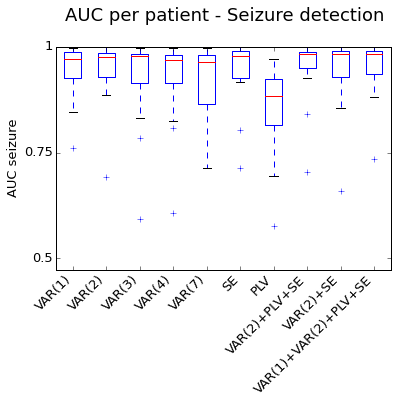

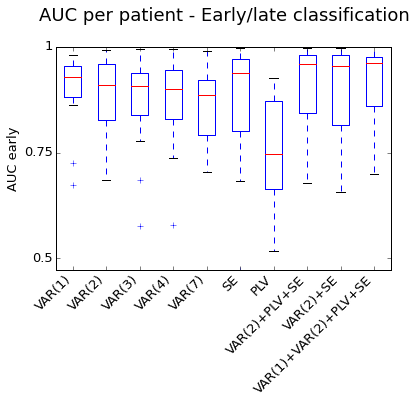

In [3]:
#path = '/nfs/nhome/live/vincenta/git/gatsby-hackathon-seizure/results/'
path = '/Users/joanasoldadomagraner/git_projects/gatsby-hackathon-seizure/results/'

#folders = ['kaggle_2_train_test','kaggle_reversed_train_test']
folders = ['kaggle_2_train_test']


features = [
        'ARFeatures()',
        'VarLagsARFeatures(2)',
        'VarLagsARFeatures(3)',
        'VarLagsARFeatures(4)',
        'VarLagsARFeatures(7)',
        'SEFeatures()',
        'PLVFeatures()',
        'StackFeatures(VarLagsARFeatures(2), PLVFeatures(), SEFeatures())',
        'StackFeatures(VarLagsARFeatures(2), SEFeatures())',
        'StackFeatures(ARFeatures(), VarLagsARFeatures(2), SEFeatures())',
        'StackFeatures(ARFeatures(), VarLagsARFeatures(2), PLVFeatures(), SEFeatures())',
        'StackFeatures(VarLagsARFeatures(2), VarLagsARFeatures(4), PLVFeatures(), SEFeatures())'
    ]

features_names = [
        'VAR(1)',
        'VAR(2)',
        'VAR(3)',
        'VAR(4)',
        'VAR(7)',
        'SE',
        'PLV',
        'VAR(2)+PLV+SE',
        'VAR(2)+SE',
        'VAR(1)+VAR(2)+SE',
        'VAR(1)+VAR(2)+PLV+SE',
        'VAR(2)+VAR(4)+PLV+SE' ]

for folder in folders:
    print folder

    files = glob.glob(path+folder+'/'+'*.p')
    print files


    range_feat = range(0,9)+[10]
    n_subjects = len(files)
    n_comb = len(range_feat)
    n_col = 2

    Res = np.zeros((n_subjects,n_comb,n_col))


    for i_f,f in enumerate(files):
        print ''
        print '---------------------------------'
        print f
        result_list = pickle.load(open(f,'rb'))
        for i_feat,feat in enumerate([result_list[i] for i in range_feat]):
            Res[i_f,i_feat,0] = feat['seizure_auc']
            Res[i_f,i_feat,1] = feat['early_auc']
            #print feat['feature_extractor']+','+str(feat['seizure_auc'])+','+str(feat['early_auc'])

        for i_feat,feat in enumerate([result_list[i] for i in range_feat]):
            #print features[i_feat], Res[i_f,i_feat,:]
            print Res[i_f,i_feat,:], 0.5*(Res[i_f,i_feat,0]+Res[i_f,i_feat,1])

    print ''
    print 'Mean and std across subjects, for each feature combination' 

    R_Av = np.mean(Res,axis=0) 
    print R_Av
    print '+-----------'
    R_std = np.std(Res,axis=0) 
    print R_std

    print '+-----------'
    print 'Mean of predictions, (seizure+early)/2 ,for each feature combination' 
    print np.mean(R_Av,axis=1).T

    print '+-----------'
    print 'Mean across features and predictions (early+seizure), for each subject' 
    print np.mean(Res,axis=(1,2))

    #--------------

    print 'Mean and std across subjects, for each feature combination' 

    Rs_Av = np.mean(Res[:,:,0],axis=0) #seizure
    Rs_std = np.std(Res[:,:,0],axis=0) 

    Re_Av = np.mean(Res[:,:,1],axis=0) #early
    Re_std = np.std(Res[:,:,1],axis=0) 

    print '\n', Rs_Av
    print '\n', Rs_std
    print '\n', Re_Av
    print '\n', Re_std


    #-----------------

    fig,ax = plt.subplots()
    ax.boxplot(Res[:,:,0])
    pmin = np.min(np.min(Res[:,:,1]))
    ax.set_title('AUC per patient - Seizure detection\n',fontsize=18, ha='center')
    ax.set_ylabel('AUC seizure')
    ax.set_ylim([pmin,1])
    ax.set_yticks([0.5,0.75,1.])
    ax.set_yticklabels(['0.5','0.75','1'])
    ax.set_xticklabels([features_names[n] for n in range_feat], rotation=45,ha='right')
    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    plt.show()
    fig.savefig(folder+'_seizure'+'.pdf',bbox_inches='tight')

    #-----------------

    fig,ax = plt.subplots()
    ax.boxplot(Res[:,:,1])
    pmin = np.min(np.min(Res[:,:,1]))
    ax.set_title('AUC per patient - Early/late classification\n'
                 ,fontsize=18, ha='center')
    ax.set_ylabel('AUC early')
    ax.set_ylim([pmin,1])
    ax.set_yticks([0.5,0.75,1.])
    ax.set_yticklabels(['0.5','0.75','1'])
    ax.set_xticklabels([features_names[n] for n in range_feat], rotation=45,ha='right')
    for item in ([ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(13)
    plt.show()
    fig.savefig(folder+'_early'+'.pdf',bbox_inches='tight')

In [6]:
print 'Mean and std across subjects, for each feature combination' 

Rs_Av = np.mean(Res[:,:,0],axis=0) #seizure
Rs_std = np.std(Res[:,:,0],axis=0) 

Re_Av = np.mean(Res[:,:,1],axis=0) #early
Re_std = np.std(Res[:,:,1],axis=0) 

print '\n', Rs_Av
print '\n', Rs_std
print '\n', Re_Av
print '\n', Re_std

Mean and std across subjects, for each feature combination

[ 0.87217256  0.86258887  0.8472854   0.84367032  0.82796602  0.85261112
  0.76323158  0.85503241  0.856436    0.85841648]

[ 0.093011    0.11881877  0.12485082  0.12958796  0.14249505  0.12359028
  0.15725201  0.13452731  0.12821542  0.12683535]

[ 0.78359227  0.79268373  0.78254913  0.76603824  0.75686671  0.82385513
  0.72263356  0.81383847  0.81865043  0.81518134]

[ 0.16940609  0.16018735  0.16507459  0.18508606  0.17894179  0.15650958
  0.14192621  0.17450054  0.16319548  0.16818099]


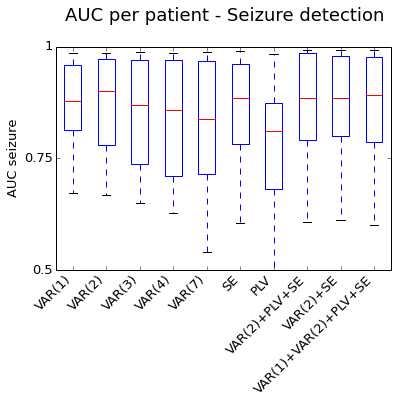

In [7]:
fig,ax = plt.subplots()
ax.boxplot(Res[:,:,0])
ax.set_title('AUC per patient - Seizure detection\n',fontsize=18, ha='center')
ax.set_ylabel('AUC seizure')
ax.set_ylim([0.65,1])
ax.set_yticks([0.5,0.75,1.])
ax.set_yticklabels(['0.5','0.75','1'])
ax.set_xticklabels([features_names[n] for n in range_feat], rotation=45,ha='right')
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
plt.show()

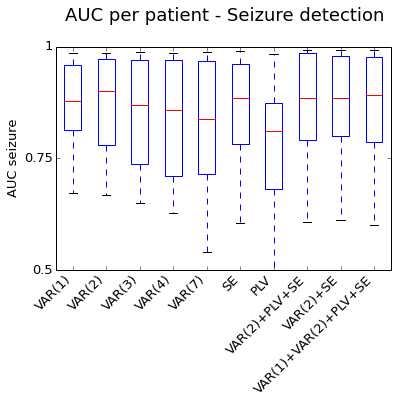

In [8]:
fig,ax = plt.subplots()
ax.boxplot(Res[:,:,0])
ax.set_title('AUC per patient - Seizure detection\n',fontsize=18, ha='center')
ax.set_ylabel('AUC seizure')
ax.set_ylim([0.65,1])
ax.set_yticks([0.5,0.75,1.])
ax.set_yticklabels(['0.5','0.75','1'])
ax.set_xticklabels([features_names[n] for n in range_feat], rotation=45,ha='right')
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
plt.show()

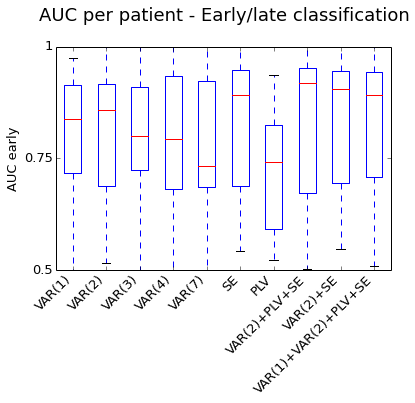

In [9]:
fig,ax = plt.subplots()
ax.boxplot(Res[:,:,1])
ax.set_title('AUC per patient - Early/late classification\n'
             ,fontsize=18, ha='center')
ax.set_ylabel('AUC early')
ax.set_ylim([0.65,1])
ax.set_yticks([0.5,0.75,1.])
ax.set_yticklabels(['0.5','0.75','1'])
ax.set_xticklabels([features_names[n] for n in range_feat], rotation=45,ha='right')
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
plt.show()

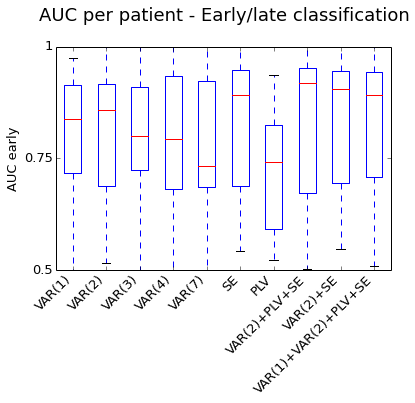

In [10]:
fig,ax = plt.subplots()
ax.boxplot(Res[:,:,1])
ax.set_title('AUC per patient - Early/late classification\n'
             ,fontsize=18, ha='center')
ax.set_ylabel('AUC early')
ax.set_ylim([0.65,1])
ax.set_yticks([0.5,0.75,1.])
ax.set_yticklabels(['0.5','0.75','1'])
ax.set_xticklabels([features_names[n] for n in range_feat], rotation=45,ha='right')
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)
plt.show()

In [11]:
#help(ax.boxplot)

In [12]:
#range_feat